In [1]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [64]:
import matplotlib.pylab as plt
import seaborn as sns
sns.despine()

import numpy as np
import random

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.layers.advanced_activations import *
from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D
from keras.layers.recurrent import LSTM, GRU
from keras import regularizers

# import theano
# theano.config.compute_test_value = "ignore"

<Figure size 432x288 with 0 Axes>

In [89]:
num_time_step = 10
forecast_num_time_step = 1
time_series_len = 10000
batch_size = 10
time_series = [np.sin(x) for x in np.linspace(0, 50, time_series_len)]

# plt.figure(figsize=(15,10))
# plt.plot(time_series)
# plt.show()

X_train = []
y_train = []
for i in range(len(time_series[num_time_step:-forecast_num_time_step])):
    X_train.append(time_series[i:i+num_time_step])
    y_train.append(time_series[i+num_time_step:i+num_time_step+forecast_num_time_step])

X_train = np.array(X_train).reshape((time_series_len - num_time_step - forecast_num_time_step,num_time_step, 1))
y_train = np.array(y_train)

model = Sequential()
model.add(LSTM(128, input_shape=(num_time_step, 1), return_sequences=True))
# model.add(Dropout(0.5))
model.add(LSTM(64, input_shape=(num_time_step, 1)))
model.add(Dense(forecast_num_time_step, activation='linear'))

model.compile(optimizer=Adam(), 
              loss='mean_squared_error')

In [73]:
history = model.fit(X_train, y_train, 
          epochs = 1, 
          batch_size = batch_size, 
          verbose=1, 
#           validation_data=(X_train, y_train),
#           callbacks=[reduce_lr, checkpointer],
          shuffle=False)

Epoch 1/1
9989/9989 [==============================] - 19s 2ms/step - loss: 0.0176


In [74]:
%%time 
X_test = []
y_test = []
for i in log_progress(range(len(time_series[num_time_step:-forecast_num_time_step]))):
    X_test.append(model.predict(np.array(time_series[i:i+num_time_step]).reshape((-1,num_time_step, 1))))

X_test = np.array(X_test)

CPU times: user 41.3 s, sys: 6.58 s, total: 47.9 s
Wall time: 28.2 s


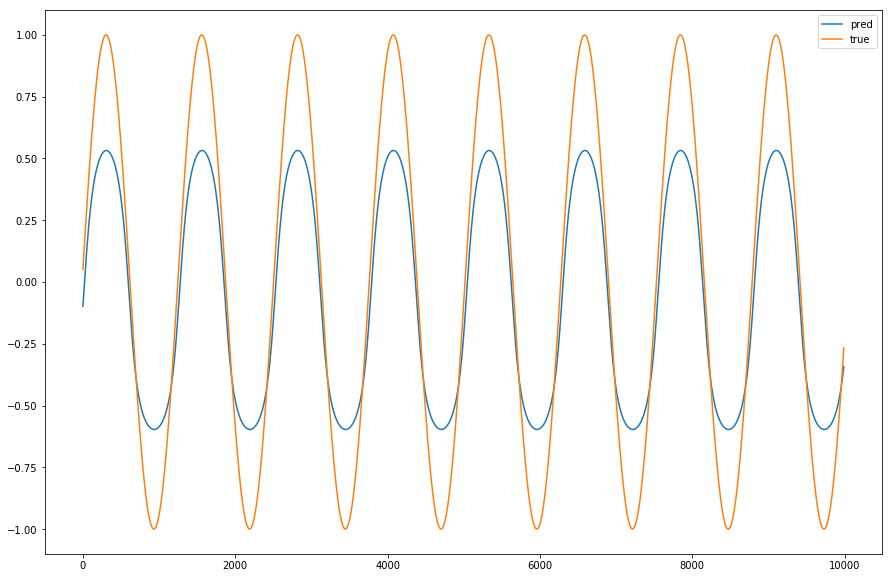

In [75]:
plt.figure(figsize=(15,10))
plt.plot(X_test.flatten())
plt.plot(time_series[num_time_step:-forecast_num_time_step])
plt.legend(['pred','true'], loc='best')
plt.show()

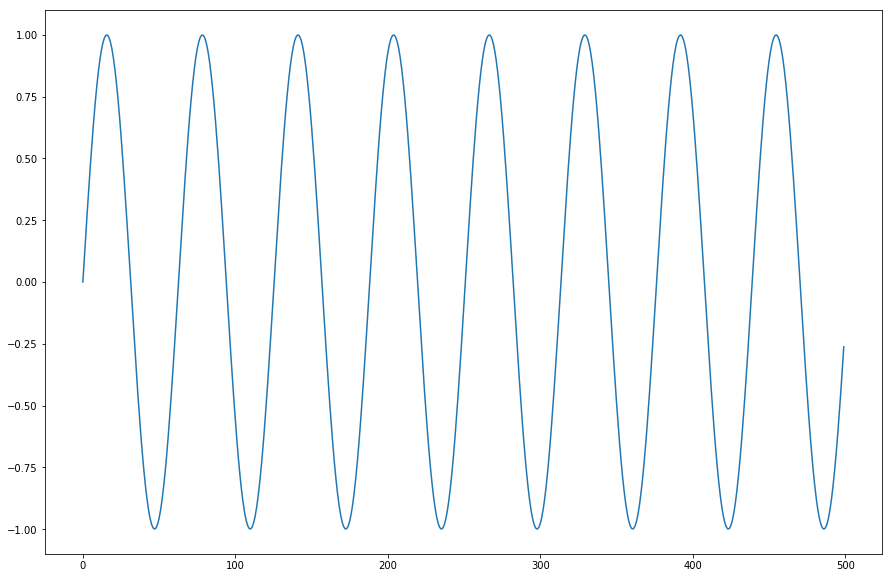

Epoch 1/1
9989/9989 [==============================] - 16s 2ms/step - loss: 0.0052


In [94]:
###################################################
num_time_step = 10
forecast_num_time_step = 1
time_series_len = 500
batch_size = 10
# time_series = [np.sin(x) + 0.5*random.random()-0.25 for x in np.linspace(0, 50, time_series_len)]
time_series = [np.sin(x) for x in np.linspace(0, 50, time_series_len)]

plt.figure(figsize=(15,10))
plt.plot(time_series)
plt.show()

X_train_noise = []
y_train_noise = []
for i in range(len(time_series[num_time_step:-forecast_num_time_step])):
    X_train_noise.append(time_series[i:i+num_time_step])
    y_train_noise.append(time_series[i+num_time_step:i+num_time_step+forecast_num_time_step])

X_train_noise = np.array(X_train_noise).reshape((time_series_len - num_time_step - forecast_num_time_step,num_time_step, 1))
y_train_noise = np.array(y_train_noise)

history = model.fit(X_train, y_train, 
          epochs = 1, 
          batch_size = batch_size, 
          verbose=1, 
#           validation_data=(X_train, y_train),
#           callbacks=[reduce_lr, checkpointer],
          shuffle=False)


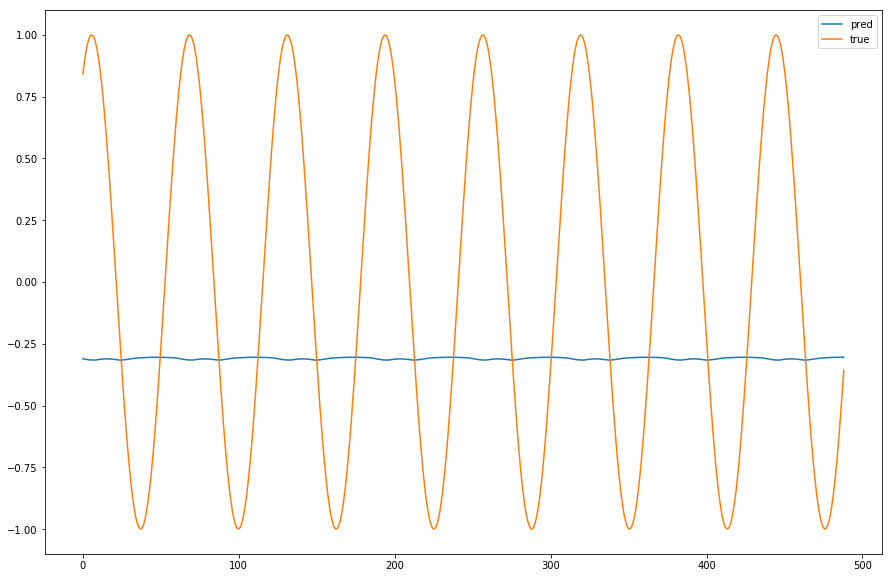

CPU times: user 2.86 s, sys: 314 ms, total: 3.17 s
Wall time: 2.22 s


In [95]:
%%time 
X_test = []
y_test = []
for i in log_progress(range(len(time_series[num_time_step:-forecast_num_time_step]))):
    X_test.append(model.predict(np.array(time_series[i:i+num_time_step]).reshape((-1,num_time_step, 1))))

X_test = np.array(X_test)

plt.figure(figsize=(15,10))
plt.plot(X_test.flatten())
plt.plot(time_series[num_time_step:-forecast_num_time_step])
plt.legend(['pred','true'], loc='best')
plt.show()